# Recurrent Vision Project (VS265, Fall 2022)

#### Team Members: Shafeeq Ibraheem, Hansen Lillemark, Jacob Yeung

#### This notebook is a basic CNN model which will train on the MNIST dataset. We will then compare its test accuracy on the MNIST test set and a noisy version of the MNIST test set. 
#### We are expecting the model to perform worse on the noisy test set, as the model has not been trained on noisy data.

In [15]:
# Import libraries for convolutional neural network and data processing
# We will use pytorch to create a convolutional neural network training on MNIST dataset.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torchsummary
from basic_CNN import CNN

# Import the MNIST dataset
from torchvision import datasets, transforms

In [2]:
device = torch.device("cuda:2" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=2)

In [4]:
train_data = datasets.MNIST(
    root="data", train=True, download=True, transform=transforms.ToTensor()
)
test_data = datasets.MNIST(
    root="data", train=False, download=True, transform=transforms.ToTensor()
)
train_data = datasets.CIFAR10(
    root="data", train=True, download=True, transform=transforms.ToTensor()
)
test_data = datasets.CIFAR10(
    root="data", train=False, download=True, transform=transforms.ToTensor()
)
print(train_data)
print(train_data.data.size)
print(test_data)
print(test_data.data.size)

Files already downloaded and verified
Files already downloaded and verified
Dataset CIFAR10
    Number of datapoints: 50000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()
153600000
Dataset CIFAR10
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()
30720000


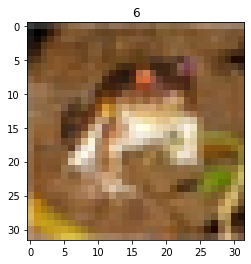

In [5]:
plt.imshow(train_data.data[0], cmap="gray")
plt.title("%i" % train_data.targets[0])
plt.show()

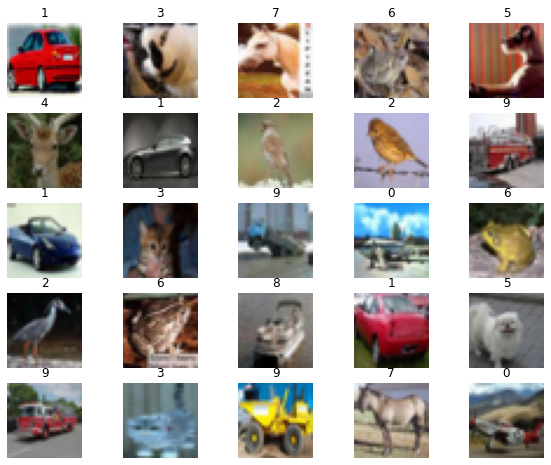

In [7]:
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(torch.permute(img.squeeze(), (1, 2, 0)), cmap="gray")
plt.show()

In [8]:
from torch.utils.data import DataLoader

# train_data.data = train_data.data.float().to(device)
# test_data.data = test_data.data.float().to(device)
loaders = {
    "train": torch.utils.data.DataLoader(
        train_data,
        batch_size=512,
        shuffle=True,
    ),
    "test": torch.utils.data.DataLoader(
        test_data,
        batch_size=512,
        shuffle=True,
    ),
}
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x7f55400cd690>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x7f55400cdb10>}

In [11]:
type(loaders["train"].dataset.data)

numpy.ndarray

In [1]:
import torch.nn as nn


class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(
                in_channels=3,
                out_channels=8,
                kernel_size=5,
                stride=1,
                padding=2,
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
        )
        kernel_size = 3
        padding = 1
        self.conv2 = nn.Sequential(
            nn.Conv2d(8, 8, kernel_size, 1, padding),
            nn.ReLU(),
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(8, 8, kernel_size, 1, padding),
            nn.ReLU(),
        )
        self.conv4 = nn.Sequential(
            nn.Conv2d(8, 8, kernel_size, 1, padding),
            nn.ReLU(),
        )
        self.conv5 = nn.Sequential(
            nn.Conv2d(8, 8, kernel_size, 1, padding),
            nn.ReLU(),
        )
        # fully connected layer, output 10 classes
        self.out = nn.Linear(8 * 14 * 14, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        # print(2, x.size())
        x = self.conv3(x)
        # print(3, x.size())
        x = self.conv2(x)
        x = self.conv3(x)
        # x = self.conv4(x)
        # x = self.conv5(x)
        # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        x = x.view(x.size(0), -1)
        output = self.out(x)
        return output, x  # return x for visualization

In [13]:
import random


seed = 0
random.seed(seed)
torch.manual_seed(seed)
cnn = CNN(4, 1, 16, dataset="cifar10").to(device)
print(cnn)

CNN(
  (conv1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv): Sequential(
    (0): Sequential(
      (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
    )
    (1): Sequential(
      (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
    )
    (2): Sequential(
      (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
    )
    (3): Sequential(
      (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
    )
  )
  (out): Linear(in_features=4096, out_features=10, bias=True)
)


In [61]:
# torchsummary.summary(cnn.to("cuda"), (1, 28, 28))

In [16]:
loss_func = nn.CrossEntropyLoss()
loss_func

CrossEntropyLoss()

In [17]:
optimizer = torch.optim.Adam(cnn.parameters(), lr=0.01)
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.01
    maximize: False
    weight_decay: 0
)

In [18]:
train_data.data[0].shape

(32, 32, 3)

In [19]:
cnn(train_data.data[0].unsqueeze(0).unsqueeze(0).float().to(device))

AttributeError: 'numpy.ndarray' object has no attribute 'unsqueeze'

In [20]:
from torch.autograd import Variable

num_epochs = 10


def train(num_epochs, cnn, loaders):

    cnn.train()

    # Train the model
    total_step = len(loaders["train"])

    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(loaders["train"]):

            # gives batch data, normalize x when iterate train_loader
            b_x = Variable(images).to(device)  # batch x
            b_y = Variable(labels).to(device)  # batch y
            # b_x = images
            # b_y = labels
            output = cnn(b_x)[0]
            loss = loss_func(output, b_y)

            # clear gradients for this training step
            optimizer.zero_grad()

            # backpropagation, compute gradients
            loss.backward()
            # apply gradients
            optimizer.step()

            if (i + 1) % 100 == 0:
                print(
                    "Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}".format(
                        epoch + 1, num_epochs, i + 1, total_step, loss.item()
                    )
                )
            pass
        pass

    pass


train(num_epochs, cnn, loaders)

In [21]:
def test():
    # Test the model
    cnn.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in loaders["test"]:
            images = images.to(device)
            labels = labels.to(device)
            test_output, last_layer = cnn(images)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
            correct += (pred_y == labels).sum().item()
        accuracy = correct / 10000
        print("Test Accuracy of the model on the 10000 test images: %.4f" % accuracy)

    pass


test()

Test Accuracy of the model on the 10000 test images: 0.1000


In [51]:
def test():
    # Test the model
    cnn.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in loaders["test"]:
            images = images.to(device)
            labels = labels.to(device)
            test_output, last_layer = cnn(images)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
            correct += (pred_y == labels).sum().item()
        accuracy = correct / 10000
        print("Test Accuracy of the model on the 10000 test images: %.4f" % accuracy)

    pass


test()

Test Accuracy of the model on the 10000 test images: 0.1052


In [22]:
sample = next(iter(loaders["test"]))
imgs, lbls = sample

In [23]:
actual_number = lbls[:10].numpy()
actual_number

array([6, 5, 8, 4, 5, 3, 0, 6, 3, 3])

In [24]:
test_output, last_layer = cnn(imgs[:10].to(device))
pred_y = torch.max(test_output, 1)[1].data.cpu().numpy().squeeze()
print(f"Prediction number: {pred_y}")
print(f"Actual number: {actual_number}")

Prediction number: [0 0 0 0 0 0 0 0 0 0]
Actual number: [6 5 8 4 5 3 0 6 3 3]


In [27]:
# Now we will add some gaussian noise to the test data and see if the performance is still good with the model which is not trained on noisy data.
# We will use the same model which we trained on clean data.


class AddGaussianNoise(object):
    def __init__(self, mean=0.0, std=1.0):
        self.std = std
        self.mean = mean

    def __call__(self, tensor):
        return tensor + torch.randn(tensor.size()) * self.std + self.mean

    def __repr__(self):
        return self.__class__.__name__ + "(mean={0}, std={1})".format(
            self.mean, self.std
        )


test_data_noisy = datasets.CIFAR10(
    root="data",
    train=False,
    download=True,
    transform=transforms.Compose(
        [
            transforms.ToTensor(),
            transforms.Normalize((0.1307,), (0.3081,)),
            AddGaussianNoise(0.0, 1.0),
        ]
    ),
)

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

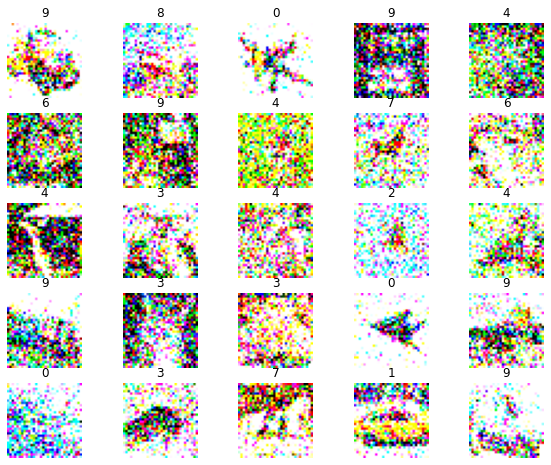

In [29]:
# View some of the noisy data
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(test_data_noisy), size=(1,)).item()
    img, label = test_data_noisy[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(torch.permute(img.squeeze(), (1, 2, 0)), cmap="gray")
plt.show()

In [24]:
loaders["test_data_noisy"] = torch.utils.data.DataLoader(
    test_data_noisy, batch_size=10000, shuffle=False, num_workers=1
)
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x7f9b550cac90>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x7f9b64b445d0>,
 'test_data_noisy': <torch.utils.data.dataloader.DataLoader at 0x7f9c563204d0>}

In [69]:
def test_noisy():
    # Test the model
    cnn.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in loaders["test_data_noisy"]:
            images = images.to(device)
            labels = labels.to(device)
            test_output, last_layer = cnn(images)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            correct += (pred_y == labels).sum().item()
        accuracy = correct / 10000
        print("Test Accuracy of the model on the 10000 test images: %.4f" % accuracy)

    pass


test_noisy()

Test Accuracy of the model on the 10000 test images: 0.3814
